#### Classification Algorithms:

   **Linear Models**
       1. Logistic Regression
       2. Perceptron
       3. Linear Discriminant Analysis (LDA)
       4. Support Vector Machines (Linear Kernel)
       5. SGDClassifier
       
   **Quadtratic Models**
       1. Quadtratic Discriminant Analysis (QDA)
       
   **Non Linear Models**
       1. Support Vector Machines (Non-Linear Kernels)
       2. KNN Classification
       3. Decision Trees
           a. Random Forest (Bagging -> Solves Variance Problem)
           b. GradientBoosting/XGBoost (Boosting -> Solves Bias Problem)
      
   **Common Loss Functions & Performance Measures**
       1. Cross-Entropy
       2. KL-Divergence
       3. Log Loss 
       4. Accuracy Score
       5. Confusion Matrix
       6. Precision
       7. Recall
       8. F1-Score
       9. ROC Curve
       10.AUC 
       
       

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, precision_recall_curve
import plotly.express as px
from matplotlib import pyplot as plt
import itertools
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#### Load  Dataset 

1. Binary Classification
2. Multi-Class Classification
3. Multi-Label Classification(Will explore more on this type of classification in Neural Networks)

In [2]:
# Load multi-class classification dataset.
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Load breast cancer classification dataset.
breast_cancer = load_breast_cancer()
X_cancer = breast_cancer.data
y_cancer = breast_cancer.target

# Split data into train and test subsets
X_digits_train, X_digits_test, y_digits_train, y_digits_test  = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42, shuffle=True, stratify=y_digits)
print("Frequency of each element in original digits dataset %s " % np.bincount(y_digits))
print("Frequency of each element in digits train dataset %s " % np.bincount(y_digits_train))
print("Frequency of each element in digits test dataset %s " % np.bincount(y_digits_test))

# Split data into train and test subsets
X_binary_train, X_binary_test, y_binary_train, y_binary_test  = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42, shuffle=True, stratify=y_cancer)
print("Frequency of each element in original breast cancer dataset %s " % np.bincount(y_digits))
print("Frequency of each element in breast cancer  train dataset %s " % np.bincount(y_binary_train))
print("Frequency of each element in breast cancer  test dataset %s " % np.bincount(y_binary_test))


Frequency of each element in original digits dataset [178 182 177 183 181 182 181 179 174 180] 
Frequency of each element in digits train dataset [124 127 124 128 127 127 127 125 122 126] 
Frequency of each element in digits test dataset [54 55 53 55 54 55 54 54 52 54] 
Frequency of each element in original breast cancer dataset [178 182 177 183 181 182 181 179 174 180] 
Frequency of each element in breast cancer  train dataset [148 250] 
Frequency of each element in breast cancer  test dataset [ 64 107] 


#### Logistic Regression

In [19]:
# Binary Classification
logistic_regression_binary = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                                        fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                        random_state=None, solver='lbfgs', max_iter=10000, 
                                        multi_class='ovr', verbose=0, 
                                        warm_start=False, 
                                        n_jobs=None, l1_ratio=None)

logistic_regression_binary.fit(X_binary_train, y_binary_train)

predictions = logistic_regression_binary.predict(X_binary_test)

# Performance Measures for Binary Classifier
labels=[0, 1]
accuracyScore = accuracy_score(y_binary_test, predictions, normalize=True)
confusionMatrix = confusion_matrix(y_binary_test, predictions, labels = labels, sample_weight=None, normalize=None)
precisionScore = precision_score(y_binary_test, predictions, labels = labels, average='binary')
recallScore = recall_score(y_binary_test, predictions, labels=labels, average='binary')

print("Accuracy : %.2f " % accuracyScore)
print("Precision Score : %.2f " % precisionScore)
print("Recall Score : %.2f " % recallScore)
print("Confusion Matrix: \n ", confusionMatrix)

Accuracy : 0.95 
Precision Score : 0.94 
Recall Score : 0.98 
Confusion Matrix: 
  [[ 57   7]
 [  2 105]]


In [15]:
predictions.size

171

#### Adjust Decision Threshold 

In logistic regression, it computes a score based on decision function, and if that score is greater than a threshold, it assigns the instance to the positive class or else it assigns the instance to the negative class. 
Adjusting threshold value impacts the precision and recall. 


**predict_proba** is a function of a (soft) classifier outputting the probability of the instance being in each of the classes.

**decision_function** is a function finds the distance to the separating hyperplane. For example, a(n) SVM classifier finds hyperplanes separating the space into areas associated with classification outcomes. This function, given a point, finds the distance to the separators.


In [6]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
decision_scores = logistic_regression_binary.decision_function(X_binary_test)
prob = logistic_regression_binary.predict_proba(X_binary_test)
pred = logistic_regression_binary.predict(X_binary_test)
list(zip(decision_scores, prob, pred))

[(-1.8798748130060332, array([0.868, 0.132]), 0),
 (4.965818543779548, array([0.007, 0.993]), 1),
 (8.875015017872645, array([0.000, 1.000]), 1),
 (-4.295128269505366, array([0.987, 0.013]), 0),
 (0.5870806763874938, array([0.357, 0.643]), 1),
 (-4.1430993126384905, array([0.984, 0.016]), 0),
 (11.621348636833792, array([0.000, 1.000]), 1),
 (-6.755686292388109, array([0.999, 0.001]), 0),
 (6.310295264950412, array([0.002, 0.998]), 1),
 (-19.566490183533514, array([1.000, 0.000]), 0),
 (9.111185376760496, array([0.000, 1.000]), 1),
 (4.6016614268897875, array([0.010, 0.990]), 1),
 (-6.380339867160796, array([0.998, 0.002]), 0),
 (0.2007258600176165, array([0.450, 0.550]), 1),
 (7.873941685474836, array([0.000, 1.000]), 1),
 (-1.4706857184194853, array([0.813, 0.187]), 0),
 (-11.097036987814864, array([1.000, 0.000]), 0),
 (3.176272985860951, array([0.040, 0.960]), 1),
 (9.86635751317046, array([0.000, 1.000]), 1),
 (3.0940439040608503, array([0.043, 0.957]), 1),
 (4.718820521140493, ar

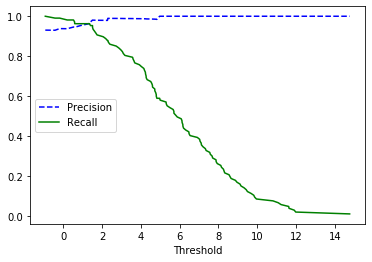

In [20]:
# Plot Precision Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_binary_test, decision_scores)
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.show()

In [10]:
pred = (decision_scores > 14) # Change this threshold for different values for precision and recall
print(precision_score(y_binary_test, pred))
print(recall_score(y_binary_test, pred))

1.0
0.009345794392523364


#### ROC Curve

It is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate(recall) against the false positive rate.

ROC curve plots sensitivity versus specificity.

**Sensitivity** (also called the true positive rate, the recall, or probability of detection[1] in some fields) measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).

**Specificity** (also called the true negative rate) measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

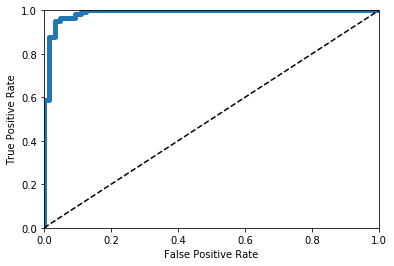

In [21]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_binary_test, decision_scores)
plt.plot(false_positive_rate, true_positive_rate, linewidth=5)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
logistic_regression_multi = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                                        fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                        random_state=None, solver='lbfgs', max_iter=10000, 
                                        multi_class='ovr', verbose=0, 
                                        warm_start=False, 
                                        n_jobs=None, l1_ratio=None)

logistic_regression_multi.fit(X_digits_train, y_digits_train)

predictions = logistic_regression_multi.predict(X_digits_test)

# Performance Measures for Multi-class Classifier
labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
accuracyScore = accuracy_score(y_digits_test, predictions, normalize=True)
confusionMatrix = confusion_matrix(y_digits_test, predictions, labels = labels, sample_weight=None, normalize=None)
precisionScore = precision_score(y_digits_test, predictions, labels = labels, average='micro')
recallScore = recall_score(y_digits_test, predictions, labels=labels, average='micro')

print("Accuracy : %.2f " % accuracyScore)
print("Precision Score : %.2f " % precisionScore)
print("Recall Score : %.2f " % recallScore)
print("Confusion Matrix: \n ", confusionMatrix)

In [ ]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
decision_scores = logistic_regression_multi.decision_function(X_digits_test)
prob = logistic_regression_multi.predict_proba(X_digits_test)
pred = logistic_regression_multi.predict(X_digits_test)
list(zip(decision_scores, prob, pred))[1]

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-class or multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

In [ ]:
# Plot Precision Recall Curve
# Multi-class format is not supported
# We have to perform one-vs-rest 

# 1 vs [0, 2, 3, 4, 5, 6, 7, 8, 9]
y_digits_binary_train = label_binarize(y=y_digits_train, classes=[1])
y_digits_binary_test = label_binarize(y=y_digits_test, classes=[1])

logistic_regression_binary.fit(X_digits_train, y_digits_binary_train.ravel())
predictions = logistic_regression_binary.predict(X_digits_test)

labels=[0, 1]
accuracyScore = accuracy_score(y_digits_binary_test, predictions, normalize=True)
confusionMatrix = confusion_matrix(y_digits_binary_test, predictions, labels = labels, sample_weight=None, normalize=None)
precisionScore = precision_score(y_digits_binary_test, predictions, labels = labels, average='binary')
recallScore = recall_score(y_digits_binary_test, predictions, labels=labels, average='binary')

print("Accuracy : %.2f " % accuracyScore)
print("Precision Score : %.2f " % precisionScore)
print("Recall Score : %.2f " % recallScore)
print("Confusion Matrix: \n ", confusionMatrix)

In [ ]:
# Plot Precision Recall Curve
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
decision_scores = logistic_regression_binary.decision_function(X_digits_test)

prob = logistic_regression_binary.predict_proba(X_digits_test)
pred = logistic_regression_binary.predict(X_digits_test)
list(zip(decision_scores, prob, pred))

precisions, recalls, thresholds = precision_recall_curve(y_digits_binary_test, decision_scores)
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.show()

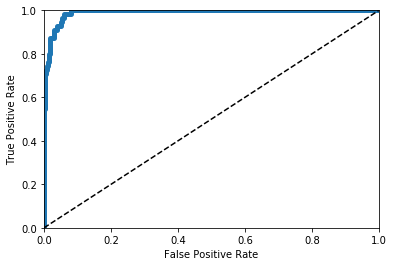

In [25]:
# Plot ROC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_digits_binary_test, decision_scores)
plt.plot(false_positive_rate, true_positive_rate, linewidth=5)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### Perceptron Algorithm

In [28]:
perceptron = Perceptron(penalty=None, fit_intercept=True, 
                        max_iter=1000, tol=0.001, shuffle=True, verbose=0,
                        eta0=1.0, n_jobs=None, random_state=0, 
                        early_stopping=False, validation_fraction=0.1,
                        n_iter_no_change=5, class_weight=None, 
                        warm_start=False)


perceptron.fit(X_binary_train, y_binary_train)

predictions = perceptron.predict(X_binary_test)

# Performance Measures for Binary Classifier
labels=[0, 1]
accuracyScore = accuracy_score(y_binary_test, predictions, normalize=True)
confusionMatrix = confusion_matrix(y_binary_test, predictions, labels = labels, sample_weight=None, normalize=None)
precisionScore = precision_score(y_binary_test, predictions, labels = labels, average='binary')
recallScore = recall_score(y_binary_test, predictions, labels=labels, average='binary')

print("Accuracy : %.2f " % accuracyScore)
print("Precision Score : %.2f " % precisionScore)
print("Recall Score : %.2f " % recallScore)
print("Confusion Matrix: \n ", confusionMatrix)

Accuracy : 0.88 
Precision Score : 0.89 
Recall Score : 0.93 
Confusion Matrix: 
  [[52 12]
 [ 8 99]]


In [33]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
decision_scores = perceptron.decision_function(X_binary_test)
pred = perceptron.predict(X_binary_test)
list(zip(decision_scores,  pred))

[(656292.8592648205, 1),
 (512182.3811877266, 1),
 (846462.6014137091, 1),
 (19904.55602793307, 1),
 (129321.62829367045, 1),
 (128154.74234200545, 1),
 (694560.943410462, 1),
 (-1640322.6283461568, 0),
 (725906.4066191646, 1),
 (-1889305.679423915, 0),
 (654940.9748523459, 1),
 (624232.7278079253, 1),
 (-1546255.1049977783, 0),
 (-332620.5004617781, 0),
 (747164.6171439836, 1),
 (-740746.8291208148, 0),
 (-2550025.098539367, 0),
 (653175.621508745, 1),
 (806059.1883749784, 1),
 (488154.101571052, 1),
 (758638.7736071812, 1),
 (363279.0874567982, 1),
 (748656.0119668669, 1),
 (-2549823.3821191546, 0),
 (-4352827.792105381, 0),
 (-183058.4662499271, 0),
 (822057.5229083349, 1),
 (-90934.54975231792, 0),
 (-280940.8253591139, 0),
 (-2213547.0255652587, 0),
 (237616.92295866145, 1),
 (-6267263.880233029, 0),
 (860427.6202132916, 1),
 (660147.4030959373, 1),
 (-4208251.4192145495, 0),
 (711067.8932411282, 1),
 (187485.3029540281, 1),
 (1008705.4690634601, 1),
 (276888.5780041415, 1),
 (-48

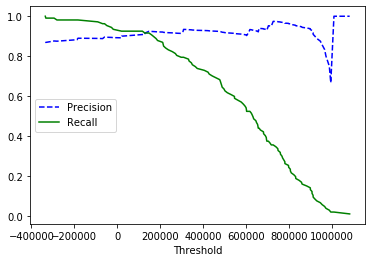

In [34]:
# Plot Precision Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_binary_test, decision_scores)
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.show()

In [36]:
pred = (decision_scores > -200000) # Change this threshold for different values for precision and recall
print(precision_score(y_binary_test, pred))
print(recall_score(y_binary_test, pred))

0.8823529411764706
0.9813084112149533


#### LDA & QDA

In [42]:
linear_discriminant_analysis = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, 
                                                        n_components=None, store_covariance=False, tol=0.0001)


linear_discriminant_analysis.fit(X_digits_train, y_digits_train)

predictions = linear_discriminant_analysis.predict(X_digits_test)

# Performance Measures for Multi-class Classifier
labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
accuracyScore = accuracy_score(y_digits_test, predictions, normalize=True)
confusionMatrix = confusion_matrix(y_digits_test, predictions, labels = labels, sample_weight=None, normalize=None)
precisionScore = precision_score(y_digits_test, predictions, labels = labels, average='micro')
recallScore = recall_score(y_digits_test, predictions, labels=labels, average='micro')

print("Accuracy : %.2f " % accuracyScore)
print("Precision Score : %.2f " % precisionScore)
print("Recall Score : %.2f " % recallScore)
print("Confusion Matrix: \n ", confusionMatrix)

Accuracy : 0.95 
Precision Score : 0.95 
Recall Score : 0.95 
Confusion Matrix: 
  [[53  0  0  0  0  0  1  0  0  0]
 [ 0 49  0  0  1  0  0  0  3  2]
 [ 0  0 51  2  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  1  0]
 [ 0  0  0  0  0 53  0  0  0  2]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  5  0  0  0  0  0  0 46  1]
 [ 0  1  0  0  0  1  0  1  4 47]]


In [44]:
quadratic_discriminant_analysis = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, 
                                                                store_covariance=False, tol=0.0001)

quadratic_discriminant_analysis.fit(X_digits_train, y_digits_train)

predictions = quadratic_discriminant_analysis.predict(X_digits_test)

# Performance Measures for Multi-class Classifier
labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
accuracyScore = accuracy_score(y_digits_test, predictions, normalize=True)
confusionMatrix = confusion_matrix(y_digits_test, predictions, labels = labels, sample_weight=None, normalize=None)
precisionScore = precision_score(y_digits_test, predictions, labels = labels, average='micro')
recallScore = recall_score(y_digits_test, predictions, labels=labels, average='micro')

print("Accuracy : %.2f " % accuracyScore)
print("Precision Score : %.2f " % precisionScore)
print("Recall Score : %.2f " % recallScore)
print("Confusion Matrix: \n ", confusionMatrix)

Accuracy : 0.87 
Precision Score : 0.87 
Recall Score : 0.87 
Confusion Matrix: 
  [[50  2  0  0  1  0  0  0  1  0]
 [ 0 41  2  1  2  1  2  0  5  1]
 [ 0  5 41  3  1  0  0  0  3  0]
 [ 0  0  1 46  0  0  0  1  6  1]
 [ 0  1  0  0 42  0  1 10  0  0]
 [ 0  0  0  0  0 54  0  1  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  3  0  3  0  1  0  1 44  0]
 [ 0  0  1  1  0  2  0  5  2 43]]


/Users/ukannika/Library/Python/3.7/lib/python/site-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear



#### Support Vector Machines

In [46]:
# RBF Kernel
svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
          shrinking=True, probability=False, tol=0.001, cache_size=200, 
          class_weight=None, verbose=False, max_iter=-1, 
          decision_function_shape='ovr', break_ties=False, 
          random_state=None)

svm.fit(X_digits_train, y_digits_train)

predictions = svm.predict(X_digits_test)

# Performance Measures for Multi-class Classifier
labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
accuracyScore = accuracy_score(y_digits_test, predictions, normalize=True)
confusionMatrix = confusion_matrix(y_digits_test, predictions, labels = labels, sample_weight=None, normalize=None)
precisionScore = precision_score(y_digits_test, predictions, labels = labels, average='micro')
recallScore = recall_score(y_digits_test, predictions, labels=labels, average='micro')

print("Accuracy : %.2f " % accuracyScore)
print("Precision Score : %.2f " % precisionScore)
print("Recall Score : %.2f " % recallScore)
print("Confusion Matrix: \n ", confusionMatrix)

Accuracy : 0.99 
Precision Score : 0.99 
Recall Score : 0.99 
Confusion Matrix: 
  [[53  0  0  0  1  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  1  0]
 [ 0  0  0  0  0 54  0  0  0  1]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  2  0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  1  0 53]]


#### KNN Classifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='ball_tree', 
                           leaf_size=30, 
                           p=2, 
                           metric='minkowski', 
                           metric_params=None, n_jobs=1)

knn.fit(X_digits_train, y_digits_train)

predictions = knn.predict(X_digits_test)

# Performance Measures for Multi-class Classifier
labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
accuracyScore = accuracy_score(y_digits_test, predictions, normalize=True)
confusionMatrix = confusion_matrix(y_digits_test, predictions, labels = labels, sample_weight=None, normalize=None)
precisionScore = precision_score(y_digits_test, predictions, labels = labels, average='micro')
recallScore = recall_score(y_digits_test, predictions, labels=labels, average='micro')

print("Accuracy : %.2f " % accuracyScore)
print("Precision Score : %.2f " % precisionScore)
print("Recall Score : %.2f " % recallScore)
print("Confusion Matrix: \n ", confusionMatrix)

Accuracy : 0.98 
Precision Score : 0.98 
Recall Score : 0.98 
Confusion Matrix: 
  [[54  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  1  0  0]
 [ 0  0  0  0  0 54  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  1  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  4  0  1  0  0  0  1 46  0]
 [ 0  0  0  0  0  0  0  1  1 52]]


#### Decision Trees